# Question 1: Time-series prediction






Prediction can be divided into two categories: regression and classification. In regression, the numerical value of the next days is predicted for a time series. In the classification, the upward or downward trend of the time series is predicted for the next few days.

In this question, you will learn about regression mode and implement a part of:
https://ieeexplore.ieee.org/document/9005997

## Import libraries

In [1]:
!pip install --upgrade mplfinance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 2.5 MB/s eta 0:00:00


In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

import datetime
from datetime import datetime
import yfinance as yf
import mplfinance as mpf

import tensorflow as tf
from tensorflow import keras
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


## 1.1- Download data

In [3]:
table = pd.read_html('https://en.wikipedia.com/wiki/List_of_S%26P_500_companies')
table[0]

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
0,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902
1,AOS,A. O. Smith,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916
2,ABT,Abbott,Health Care,Health Care Equipment,"North Chicago, Illinois",1957-03-04,1800,1888
3,ABBV,AbbVie,Health Care,Biotechnology,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
4,ACN,Accenture,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989
...,...,...,...,...,...,...,...,...
498,YUM,Yum! Brands,Consumer Discretionary,Restaurants,"Louisville, Kentucky",1997-10-06,1041061,1997
499,ZBRA,Zebra Technologies,Information Technology,Electronic Equipment & Instruments,"Lincolnshire, Illinois",2019-12-23,877212,1969
500,ZBH,Zimmer Biomet,Health Care,Health Care Equipment,"Warsaw, Indiana",2001-08-07,1136869,1927
501,ZION,Zions Bancorporation,Financials,Regional Banks,"Salt Lake City, Utah",2001-06-22,109380,1873


In [4]:
New_table = table[0]

In [5]:
New_table_2 = New_table[[ datetime.strptime(dt, '%Y-%m-%d') < datetime(2010,1,1) for dt in New_table['Date added'] ] ]
New_table_2

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
0,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902
2,ABT,Abbott,Health Care,Health Care Equipment,"North Chicago, Illinois",1957-03-04,1800,1888
5,ADBE,Adobe Inc.,Information Technology,Application Software,"San Jose, California",1997-05-05,796343,1982
7,AES,AES Corporation,Utilities,Independent Power Producers & Energy Traders,"Arlington, Virginia",1998-10-02,874761,1981
8,AFL,Aflac,Financials,Life & Health Insurance,"Columbus, Georgia",1999-05-28,4977,1955
...,...,...,...,...,...,...,...,...
495,WYNN,Wynn Resorts,Consumer Discretionary,Casinos & Gaming,"Paradise, Nevada",2008-11-14,1174922,2002
496,XEL,Xcel Energy,Utilities,Multi-Utilities,"Minneapolis, Minnesota",1957-03-04,72903,1909
498,YUM,Yum! Brands,Consumer Discretionary,Restaurants,"Louisville, Kentucky",1997-10-06,1041061,1997
500,ZBH,Zimmer Biomet,Health Care,Health Care Equipment,"Warsaw, Indiana",2001-08-07,1136869,1927


In [6]:
My_Tickers = New_table_2['Symbol'].tolist()

if 'BF.B' in My_Tickers:
    My_Tickers.remove('BF.B')

My_Tickers


['MMM',
 'ABT',
 'ADBE',
 'AES',
 'AFL',
 'A',
 'APD',
 'AKAM',
 'ALL',
 'GOOG',
 'MO',
 'AMZN',
 'AEE',
 'AEP',
 'AXP',
 'AIG',
 'AMT',
 'AMP',
 'AMGN',
 'APH',
 'ADI',
 'AON',
 'APA',
 'AAPL',
 'AMAT',
 'ADM',
 'AIZ',
 'T',
 'ADSK',
 'ADP',
 'AZO',
 'AVB',
 'AVY',
 'BALL',
 'BAC',
 'BK',
 'BBWI',
 'BAX',
 'BDX',
 'BBY',
 'BIIB',
 'BA',
 'BKNG',
 'BXP',
 'BSX',
 'BMY',
 'CPB',
 'COF',
 'CAH',
 'CCL',
 'CAT',
 'CBRE',
 'COR',
 'CNP',
 'CF',
 'CHRW',
 'SCHW',
 'CVX',
 'CI',
 'CINF',
 'CTAS',
 'CSCO',
 'C',
 'CLX',
 'CME',
 'CMS',
 'KO',
 'CTSH',
 'CL',
 'CMCSA',
 'CMA',
 'CAG',
 'COP',
 'ED',
 'STZ',
 'GLW',
 'COST',
 'CTRA',
 'CSX',
 'CMI',
 'CVS',
 'DHR',
 'DRI',
 'DVA',
 'DE',
 'XRAY',
 'DVN',
 'DFS',
 'DOV',
 'DHI',
 'DTE',
 'DUK',
 'EMN',
 'ETN',
 'EBAY',
 'ECL',
 'EIX',
 'EA',
 'ELV',
 'LLY',
 'EMR',
 'ETR',
 'EOG',
 'EFX',
 'EQR',
 'EL',
 'ES',
 'EXC',
 'EXPE',
 'EXPD',
 'XOM',
 'FAST',
 'FDX',
 'FIS',
 'FITB',
 'FE',
 'FI',
 'FMC',
 'F',
 'BEN',
 'GEN',
 'GD',
 'GE',
 'GIS',
 'G

In [7]:
Raw_price_for_my_tickers = yf.download(tickers=My_Tickers, start="2010-01-04", interval="1d", group_by="ticker")


[*********************100%%**********************]  290 of 290 completed


In [8]:
Raw_price_for_my_tickers

SPGI                                                  \
                  Open        High         Low       Close   Adj Close   
Date                                                                     
2010-01-04   33.919998   33.919998   33.380001   33.610001   26.178247   
2010-01-05   33.490002   33.639999   33.320000   33.639999   26.201611   
2010-01-06   33.400002   33.599998   33.200001   33.340000   25.967951   
2010-01-07   33.360001   34.119999   33.259998   34.080002   26.544327   
2010-01-08   33.939999   34.060001   33.610001   33.950001   26.443073   
...                ...         ...         ...         ...         ...   
2023-12-07  419.500000  419.929993  416.600006  417.380005  417.380005   
2023-12-08  415.640015  418.850006  413.170013  415.380005  415.380005   
2023-12-11  416.119995  424.130005  415.980011  423.750000  423.750000   
2023-12-12  423.489990  427.149994  422.329987  426.809998  426.809998   
2023-12-13  428.899994  435.989990  427.369995  435.260010  435.260010   

                           EXPD                                      ...  \
             Volume        Open        High         Low       Close  ...   
Date                                                                 ...   
2010-01-04  1572200   35.090000   35.180000   34.840000   35.080002  ...   
2010-01-05  1443400   34.990002   35.340000   34.869999   35.320000  ...   
2010-01-06  1328300   35.169998   35.349998   34.430000   34.500000  ...   
2010-01-07  2010700   34.400002   34.529999   34.009998   34.290001  ...   
2010-01-08  1075400   34.290001   35.080002   34.290001   34.650002  ...   
...             ...         ...         ...         ...         ...  ...   
2023-12-07  1243000  120.970001  121.220001  119.870003  120.099998  ...   
2023-12-08  1651500  119.930000  120.889999  119.489998  120.370003  ...   
2023-12-11  1380200  119.980003  120.709999  118.690002  120.379997  ...   
2023-12-12  1095900  120.680000  120.959999  119.970001  120.519997  ...   
2023-12-13  1188600  120.620003  122.410004  119.629997  122.290001  ...   

                 PCAR                                       CPB             \
                  Low      Close  Adj Close   Volume       Open       High   
Date                                                                         
2010-01-04  24.213333  24.406668  15.465243  3947550  33.910000  33.980000   
2010-01-05  24.320000  24.846666  15.744041  3448950  33.919998  34.169998   
2010-01-06  24.700001  25.173332  15.951033  5347500  33.840000  33.919998   
2010-01-07  24.986668  25.506666  16.162249  3683550  33.450001  33.450001   
2010-01-08  25.286667  25.540001  16.183374  3606450  33.040001  33.119999   
...               ...        ...        ...      ...        ...        ...   
2023-12-07  94.339996  95.519997  95.519997  2095300  43.380001  43.980000   
2023-12-08  94.879997  95.379997  95.379997  2186200  43.430000  43.529999   
2023-12-11  96.199997  97.930000  97.930000  2524000  43.220001  43.840000   
2023-12-12  97.519997  97.629997  97.629997  2122700  43.950001  44.520000   
2023-12-13  96.610001  98.059998  98.059998  2541500  44.480000  45.599998   

                                                      
                  Low      Close  Adj Close   Volume  
Date                                                  
2010-01-04  33.709999  33.869999  22.306585  1574200  
2010-01-05  33.599998  33.930000  22.346106  2497100  
2010-01-06  33.360001  33.549999  22.095842  2829500  
2010-01-07  32.970001  33.040001  21.759958  3232600  
2010-01-08  32.680000  32.830002  21.621647  2203200  
...               ...        ...        ...      ...  
2023-12-07  42.549999  43.439999  43.439999  4722700  
2023-12-08  42.730000  42.910000  42.910000  2844400  
2023-12-11  43.099998  43.830002  43.830002  3286400  
2023-12-12  43.799999  44.389999  44.389999  3026500  
2023-12-13  44.470001  45.340000  45.340000  4099500  

[3511 rows x 1740 columns]

In [9]:
Raw_price_for_my_tickers.head()

SPGI                                                       \
                 Open       High        Low      Close  Adj Close   Volume   
Date                                                                         
2010-01-04  33.919998  33.919998  33.380001  33.610001  26.178247  1572200   
2010-01-05  33.490002  33.639999  33.320000  33.639999  26.201611  1443400   
2010-01-06  33.400002  33.599998  33.200001  33.340000  25.967951  1328300   
2010-01-07  33.360001  34.119999  33.259998  34.080002  26.544327  2010700   
2010-01-08  33.939999  34.060001  33.610001  33.950001  26.443073  1075400   

                 EXPD                                   ...       PCAR  \
                 Open       High        Low      Close  ...        Low   
Date                                                    ...              
2010-01-04  35.090000  35.180000  34.840000  35.080002  ...  24.213333   
2010-01-05  34.990002  35.340000  34.869999  35.320000  ...  24.320000   
2010-01-06  35.169998  35.349998  34.430000  34.500000  ...  24.700001   
2010-01-07  34.400002  34.529999  34.009998  34.290001  ...  24.986668   
2010-01-08  34.290001  35.080002  34.290001  34.650002  ...  25.286667   

                                                 CPB                        \
                Close  Adj Close   Volume       Open       High        Low   
Date                                                                         
2010-01-04  24.406668  15.465243  3947550  33.910000  33.980000  33.709999   
2010-01-05  24.846666  15.744041  3448950  33.919998  34.169998  33.599998   
2010-01-06  25.173332  15.951033  5347500  33.840000  33.919998  33.360001   
2010-01-07  25.506666  16.162249  3683550  33.450001  33.450001  32.970001   
2010-01-08  25.540001  16.183374  3606450  33.040001  33.119999  32.680000   

                                           
                Close  Adj Close   Volume  
Date                                       
2010-01-04  33.869999  22.306585  1574200  
2010-01-05  33.930000  22.346106  2497100  
2010-01-06  33.549999  22.095842  2829500  
2010-01-07  33.040001  21.759958  3232600  
2010-01-08  32.830002  21.621647  2203200  

[5 rows x 1740 columns]

In [10]:
Raw_price_for_my_tickers.columns

MultiIndex([('SPGI',      'Open'),
            ('SPGI',      'High'),
            ('SPGI',       'Low'),
            ('SPGI',     'Close'),
            ('SPGI', 'Adj Close'),
            ('SPGI',    'Volume'),
            ('EXPD',      'Open'),
            ('EXPD',      'High'),
            ('EXPD',       'Low'),
            ('EXPD',     'Close'),
            ...
            ('PCAR',       'Low'),
            ('PCAR',     'Close'),
            ('PCAR', 'Adj Close'),
            ('PCAR',    'Volume'),
            ( 'CPB',      'Open'),
            ( 'CPB',      'High'),
            ( 'CPB',       'Low'),
            ( 'CPB',     'Close'),
            ( 'CPB', 'Adj Close'),
            ( 'CPB',    'Volume')],
           length=1740)

## 2-1. Exploring time series data and familiarizing with famous theories and libraries

#### Question 1: If the null data was at the beginning, what methods can be used to solve this problem?

If we had null data at the beginning of a time series and we want to handle it, there are several methods we can consider:

* Forward Fill (Pad): This method involves filling missing values with the last known value. This approach assumes that the future values will be similar to the most recent past values.
` Raw_price_for_my_tickers.ffill(inplace=True) `

* Backward Fill (Bfill): This method involves filling missing values with the next available value. Similar to forward fill, it assumes that the past values will be similar to the most recent future values.
`Raw_price_for_my_tickers.bfill(inplace=True)`

* Interpolation: Interpolation is a method where missing values are estimated based on the values around them. There are different interpolation methods available, such as linear interpolation, polynomial interpolation, etc.
`Raw_price_for_my_tickers.interpolate(method='linear', inplace=True)`

* Replace with a Constant: You can replace with cons values.
`Raw_price_for_my_tickers.fillna(value=0, inplace=True)`

#### Question 2: If we have null value data in the middle or at the end of the time series, how do we solve it?


If we have null values in the middle or at the end of a time series, we can use similar methods to handle the missing data. Here are some common approaches:

There are several methods to handle missing values in time series data, including:

* Interpolation: This method replaces missing values with estimates based on the values of surrounding time points. Common interpolation methods include linear interpolation and spline interpolation.

* Extrapolation: This method extends the time series data beyond the existing data points by using mathematical models to estimate missing values.

* Forward-fill and backward-fill: In forward-fill, missing values are filled in with the next available value. In backward-fill, missing values are filled in with the previous available value.

* Last Observation Carried Forward (LOCF): This method replaces missing values with the last observed value.

* Multiple imputation: This method uses statistical methods to generate multiple estimates for missing values and then combines the results to produce a single estimate.

In [11]:
print(Raw_price_for_my_tickers.isna().sum())


SPGI  Open         0
      High         0
      Low          0
      Close        0
      Adj Close    0
                  ..
CPB   High         0
      Low          0
      Close        0
      Adj Close    0
      Volume       0
Length: 1740, dtype: int64


Of course, some of the weekdays might be public holidays in which case no price will be available. For this reason, we will fill the missing prices with the latest available prices

In [12]:
Raw_price_for_my_tickers.fillna(method='ffill', inplace=True)
Raw_price_for_my_tickers = Raw_price_for_my_tickers.fillna(method='ffill')
print(Raw_price_for_my_tickers.isna().sum())


SPGI  Open         0
      High         0
      Low          0
      Close        0
      Adj Close    0
                  ..
CPB   High         0
      Low          0
      Close        0
      Adj Close    0
      Volume       0
Length: 1740, dtype: int64


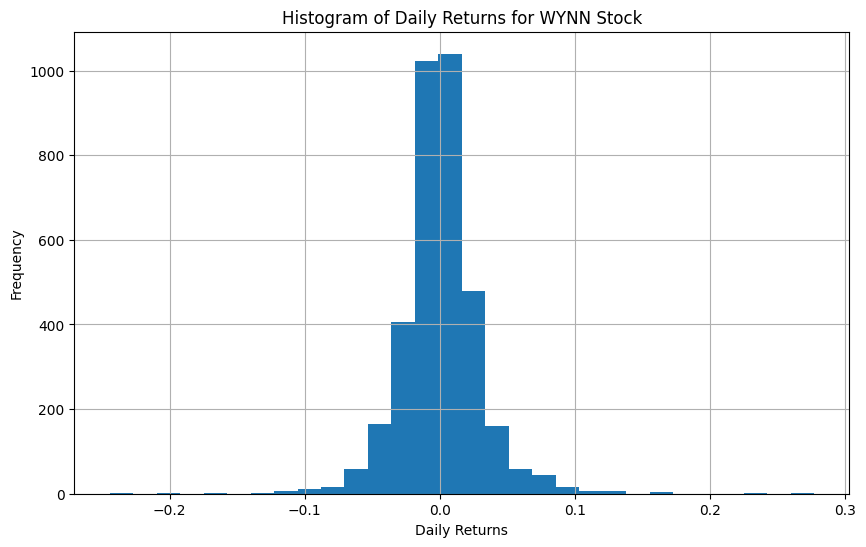

In [13]:
plt.figure(figsize=(10, 6))
( Raw_price_for_my_tickers['WYNN']['Close'].pct_change()).hist(bins=30)
plt.title('Histogram of Daily Returns for WYNN Stock')
plt.xlabel('Daily Returns')
plt.ylabel('Frequency')
plt.show()

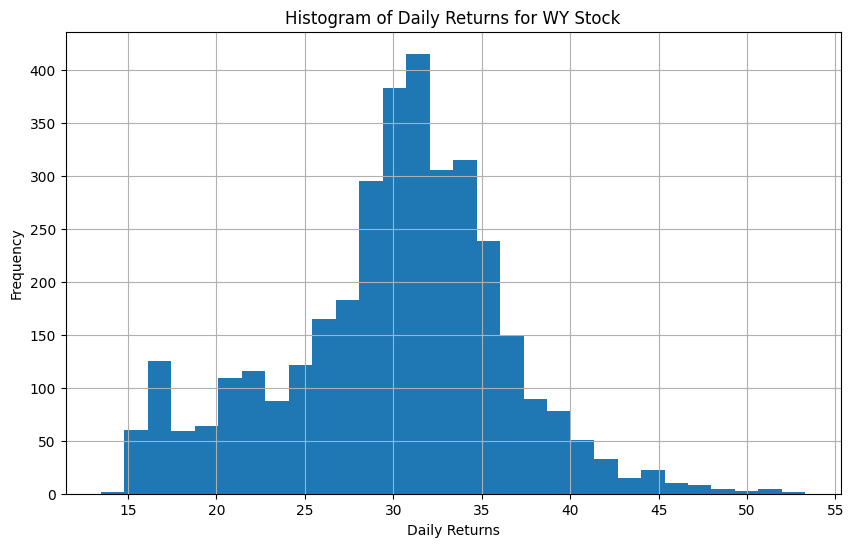

In [14]:
plt.figure(figsize=(10, 6))
(Raw_price_for_my_tickers['WY']['Close']).hist(bins=30)
plt.title('Histogram of Daily Returns for WY Stock')
plt.xlabel('Daily Returns')
plt.ylabel('Frequency')
plt.show()

According to the Random walks theory, prediction of next days stock closing price is not dependent to anything and it can goes up or down. Based on out plots we can see that if we relay on the previos day for out prediction and getting the trend downward or upward from the charts trend we can get high accuraccy because of the semi-normal values.



So in the marketing data if we look too backward we might get incorrect data and it is better to look a few days before what day we want to predict.

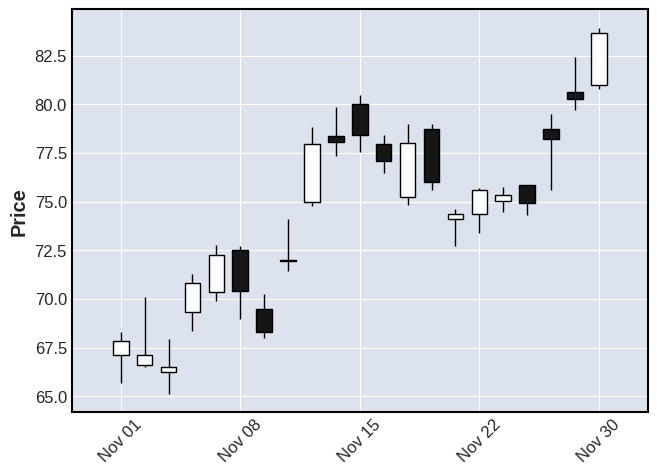

In [15]:
wynn_data = Raw_price_for_my_tickers['WYNN']
wynn_data_november = wynn_data['2022-11-01':'2022-11-30']

mpf.plot(wynn_data_november, type='candle')


## 3-1. TimeSeriesSplit

here we only keep:
selected_tickers = ['AMZN', 'MSFT', 'AAPL', 'META', 'GOOGL']


In [16]:
tickers_to_download = ['GOOGL']
additional_data_google = yf.download(tickers_to_download, start="2010-01-04", interval="1d", group_by="ticker")
tickers_to_download = ['META']
additional_data_META = yf.download(tickers_to_download, start="2010-01-04", interval="1d", group_by="ticker")
tickers_to_download = ['AMZN']
additional_data_AMZN = yf.download(tickers_to_download, start="2010-01-04", interval="1d", group_by="ticker")
tickers_to_download = ['MSFT']
additional_data_MSFT = yf.download(tickers_to_download, start="2010-01-04", interval="1d", group_by="ticker")
tickers_to_download = ['AAPL']
additional_data_AAPL = yf.download(tickers_to_download, start="2010-01-04", interval="1d", group_by="ticker")


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [17]:
additional_data_google = additional_data_google.interpolate(method='linear')
additional_data_META = additional_data_META.interpolate(method='linear')
additional_data_AMZN = additional_data_META.interpolate(method='linear')
additional_data_MSFT = additional_data_META.interpolate(method='linear')
additional_data_AAPL = additional_data_META.interpolate(method='linear')


In [18]:
additional_data_google


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,15.689439,15.753504,15.621622,15.684434,15.684434,78169752
2010-01-05,15.695195,15.711712,15.554054,15.615365,15.615365,120067812
2010-01-06,15.662162,15.662162,15.174174,15.221722,15.221722,158988852
2010-01-07,15.250250,15.265265,14.831081,14.867367,14.867367,256315428
2010-01-08,14.814815,15.096346,14.742492,15.065566,15.065566,188783028
...,...,...,...,...,...,...
2023-12-07,135.039993,138.559998,134.699997,136.929993,136.929993,56767100
2023-12-08,134.199997,136.399994,134.029999,134.990005,134.990005,32233900
2023-12-11,132.380005,133.339996,131.360001,133.289993,133.289993,31138000


In [19]:
additional_data_META

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-05-18,42.049999,45.000000,38.000000,38.230000,38.230000,573576400
2012-05-21,36.529999,36.660000,33.000000,34.029999,34.029999,168192700
2012-05-22,32.610001,33.590000,30.940001,31.000000,31.000000,101786600
2012-05-23,31.370001,32.500000,31.360001,32.000000,32.000000,73600000
2012-05-24,32.950001,33.209999,31.770000,33.029999,33.029999,50237200
...,...,...,...,...,...,...
2023-12-07,317.769989,328.239990,317.769989,326.589996,326.589996,15905100
2023-12-08,323.089996,333.170013,323.000000,332.750000,332.750000,14077500
2023-12-11,329.399994,329.890015,320.000000,325.279999,325.279999,25802500


In [20]:
combined_data = pd.concat([additional_data_google, additional_data_META], axis=1, keys=['GOOGL', 'META'])
combined_data

GOOGL                                                  \
                  Open        High         Low       Close   Adj Close   
Date                                                                     
2010-01-04   15.689439   15.753504   15.621622   15.684434   15.684434   
2010-01-05   15.695195   15.711712   15.554054   15.615365   15.615365   
2010-01-06   15.662162   15.662162   15.174174   15.221722   15.221722   
2010-01-07   15.250250   15.265265   14.831081   14.867367   14.867367   
2010-01-08   14.814815   15.096346   14.742492   15.065566   15.065566   
...                ...         ...         ...         ...         ...   
2023-12-07  135.039993  138.559998  134.699997  136.929993  136.929993   
2023-12-08  134.199997  136.399994  134.029999  134.990005  134.990005   
2023-12-11  132.380005  133.339996  131.360001  133.289993  133.289993   
2023-12-12  131.809998  133.000000  131.259995  132.520004  132.520004   
2023-12-13  133.380005  133.500000  131.570007  132.570007  132.570007   

                             META                                      \
               Volume        Open        High         Low       Close   
Date                                                                    
2010-01-04   78169752         NaN         NaN         NaN         NaN   
2010-01-05  120067812         NaN         NaN         NaN         NaN   
2010-01-06  158988852         NaN         NaN         NaN         NaN   
2010-01-07  256315428         NaN         NaN         NaN         NaN   
2010-01-08  188783028         NaN         NaN         NaN         NaN   
...               ...         ...         ...         ...         ...   
2023-12-07   56767100  317.769989  328.239990  317.769989  326.589996   
2023-12-08   32233900  323.089996  333.170013  323.000000  332.750000   
2023-12-11   31138000  329.399994  329.890015  320.000000  325.279999   
2023-12-12   29032800  324.600006  334.470001  324.559998  334.220001   
2023-12-13   29906600  333.929993  338.369995  332.640015  334.739990   

                                    
             Adj Close      Volume  
Date                                
2010-01-04         NaN         NaN  
2010-01-05         NaN         NaN  
2010-01-06         NaN         NaN  
2010-01-07         NaN         NaN  
2010-01-08         NaN         NaN  
...                ...         ...  
2023-12-07  326.589996  15905100.0  
2023-12-08  332.750000  14077500.0  
2023-12-11  325.279999  25802500.0  
2023-12-12  334.220001  18485500.0  
2023-12-13  334.739990  16289100.0  

[3511 rows x 12 columns]

In [21]:
selected_tickers = ['AMZN', 'MSFT', 'AAPL','META','GOOGL']
data_full_scaled_sp500 = yf.download(selected_tickers, start="2010-01-04", interval="1d", group_by="ticker")
data_full_scaled_sp500_cleaned = data_full_scaled_sp500.dropna()
data_full_scaled_sp500_cleaned

[*********************100%%**********************]  5 of 5 completed


MSFT                                                  \
                  Open        High         Low       Close   Adj Close   
Date                                                                     
2012-05-18   29.790001   29.809999   29.170000   29.270000   23.571964   
2012-05-21   29.100000   29.790001   29.059999   29.750000   23.958529   
2012-05-22   29.690001   29.879999   29.500000   29.760000   23.966579   
2012-05-23   29.350000   29.400000   28.639999   29.110001   23.443119   
2012-05-24   29.160000   29.299999   28.760000   29.070000   23.410906   
...                ...         ...         ...         ...         ...   
2023-12-07  368.230011  371.450012  366.320007  370.950012  370.950012   
2023-12-08  369.200012  374.459991  368.230011  374.230011  374.230011   
2023-12-11  368.480011  371.600006  366.100006  371.299988  371.299988   
2023-12-12  370.850006  374.420013  370.459991  374.380005  374.380005   
2023-12-13  376.019989  377.640015  370.769989  374.369995  374.369995   

                            AAPL                                      ...  \
              Volume        Open        High         Low       Close  ...   
Date                                                                  ...   
2012-05-18  56205300   19.070000   19.407499   18.649286   18.942142  ...   
2012-05-21  38787900   19.089287   20.055000   19.073214   20.045713  ...   
2012-05-22  39504900   20.341070   20.495714   19.735001   19.891787  ...   
2012-05-23  65171000   19.910713   20.457144   19.758215   20.377144  ...   
2012-05-24  52575000   20.566786   20.589287   20.043928   20.190001  ...   
...              ...         ...         ...         ...         ...  ...   
2023-12-07  23118900  193.630005  195.000000  193.589996  194.270004  ...   
2023-12-08  20144800  194.199997  195.990005  193.669998  195.710007  ...   
2023-12-11  27708800  193.110001  193.490005  191.419998  193.179993  ...   
2023-12-12  24838300  193.080002  194.720001  191.720001  194.710007  ...   
2023-12-13  30681800  195.089996  198.000000  194.850006  197.960007  ...   

                  META                                            GOOGL  \
                   Low       Close   Adj Close       Volume        Open   
Date                                                                      
2012-05-18   38.000000   38.230000   38.230000  573576400.0   15.643143   
2012-05-21   33.000000   34.029999   34.029999  168192700.0   15.027778   
2012-05-22   30.940001   31.000000   31.000000  101786600.0   15.351351   
2012-05-23   31.360001   32.000000   32.000000   73600000.0   15.056306   
2012-05-24   31.770000   33.029999   33.029999   50237200.0   15.244244   
...                ...         ...         ...          ...         ...   
2023-12-07  317.769989  326.589996  326.589996   15905100.0  135.039993   
2023-12-08  323.000000  332.750000  332.750000   14077500.0  134.199997   
2023-12-11  320.000000  325.279999  325.279999   25802500.0  132.380005   
2023-12-12  324.559998  334.220001  334.220001   18485500.0  131.809998   
2023-12-13  332.640015  334.739990  334.739990   16289100.0  133.380005   

                                                                       
                  High         Low       Close   Adj Close     Volume  
Date                                                                   
2012-05-18   15.826326   14.932432   15.025025   15.025025  238701060  
2012-05-21   15.407658   15.015015   15.368118   15.368118  122892984  
2012-05-22   15.360611   14.914915   15.035035   15.035035  121953924  
2012-05-23   15.255255   14.942943   15.251752   15.251752  126996876  
2012-05-24   15.313313   14.986737   15.106607   15.106607   75576348  
...                ...         ...         ...         ...        ...  
2023-12-07  138.559998  134.699997  136.929993  136.929993   56767100  
2023-12-08  136.399994  134.029999  134.990005  134.990005   32233900  
2023-12-11  133.339996  131.360001  133.289993  133.289993 

Here in time series cross validation is not possible as before:

https://medium.com/@soumyachess1496/cross-validation-in-time-series-566ae4981ce4

The method that can be used for cross-validating the time-series model is cross-validation on a rolling basis. Start with a small subset of data for training purpose, forecast for the later data points and then checking the accuracy for the forecasted data points. The same forecasted data points are then included as part of the next training dataset and subsequent data points are forecasted.

The idea of cross-validation should be more straightforward to grasp when we look at an example. Imagine that we have only 5 observations in our cross-validation set and we want to perform 4-fold cross-validation.

Here is the dataset: [1, 2, 3, 4, 5]

There is only one way to generate such pairs from my dataset. As a result, I get 4 pairs of training/test sets:

- Training: [1] Test: [2]

- Training: [1, 2] Test: [3]

- Training: [1, 2, 3] Test: [4]

- Training: [1, 2, 3, 4] Test: [5]

Compute the average of the accuracies of the 4 test fold.

In [22]:
cv_n_splits = 5
tss = sklearn.model_selection.TimeSeriesSplit(n_splits = cv_n_splits )

## 4-1. Preparing input and output model

**The input of the model** is the data of previous days. This data can only include the price close of the last few days. Or it can include open, high, low, and volume data. To reduce dimensionality, usually only price close is used to train the model.

**The output of the price model** is a specific day in the future (Horizon). For this exercise, you will only predict the next day's data

In [46]:

window_size = 5
cv_n_splits = 5
tss = sklearn.model_selection.TimeSeriesSplit(n_splits=cv_n_splits)

x_tickers_sp500 = []
y_tickers_sp500 = []

x_scaler = StandardScaler()
y_scaler = StandardScaler()

# Loop through each ticker
for ticker_name in selected_tickers:
    X_time_series = []
    Y_time_series = []

    for i in range(window_size, len(data_full_scaled_sp500_cleaned[ticker_name])):
      X_time_series.append( data_full_scaled_sp500_cleaned[ticker_name]['Close'][i-window_size:i])
      Y_time_series.append( data_full_scaled_sp500_cleaned[ticker_name]['Close'][i])

    X_time_series = np.array(X_time_series)
    Y_time_series = np.array(Y_time_series)

    x_tickers_sp500.append( X_time_series[(31 - window_size):])
    y_tickers_sp500.append( Y_time_series[(31 - window_size):])




In [42]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
x_tickers_sp500_normalized = [scaler.fit_transform(array) for array in x_tickers_sp500]
y_tickers_sp500_normalized = [scaler.fit_transform(array) for array in y_tickers_sp500]
print("Length of y_tickers_sp500[0]:", len(y_tickers_sp500_normalized[0]))
print("Length of x_tickers_sp500[0]:", len(x_tickers_sp500_normalized[0]))


Length of y_tickers_sp500[0]: 2881
Length of x_tickers_sp500[0]: 2881


In [43]:
print(len(x_tickers_sp500[0]))
print(len(y_tickers_sp500[0]))


2881
2881


## 5-1. Neural network models with memory

In [91]:
import random
number_of_runs = 0
seed_value = 2

In [92]:
for ticker_name in selected_tickers:
  full_data = data_full_scaled_sp500_cleaned[ticker_name]
  print(ticker_name , len(full_data))
  #print(full_data['Close'][0])

  # Time series split
  for j, (train_index, test_index) in enumerate(tss.split(full_data)):

    #Different seeds
    for new_seed in range(5):
#      seed_value = new_seed
      random.seed(seed_value)
      np.random.seed(seed_value)
      tf.random.set_seed(seed_value)
      keras.utils.set_random_seed(seed_value)

      number_of_runs += 1

      train_data = full_data['Close'][train_index]
      test_data = full_data['Close'][test_index]

AMZN 2912
MSFT 2912
AAPL 2912
META 2912
GOOGL 2912


In [104]:
train_data.head()


Date
2012-05-18    15.025025
2012-05-21    15.368118
2012-05-22    15.035035
2012-05-23    15.251752
2012-05-24    15.106607
Name: Close, dtype: float64

In [100]:
test_data.head()


Date
2022-01-10    138.669495
2022-01-11    139.735992
2022-01-12    141.430496
2022-01-13    138.587006
2022-01-14    139.480499
Name: Close, dtype: float64

### 5-1.1 LSTM model

In [146]:
x_train = np.concatenate(x_tickers_sp500_normalized, axis=0)
y_train = np.concatenate(y_tickers_sp500_normalized, axis=0)


In [147]:
x_train.shape

(14405, 5)

In [148]:
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], 1))


In [149]:
x_train.shape

(14405, 5, 1)

In [138]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.layers import RepeatVector


In [158]:
input_shape = (x_train.shape[1], x_train.shape[2])

model = Sequential()
model.add(LSTM(units=50, activation='relu', input_shape=input_shape))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mse')


In [151]:
model.fit(x_train, y_train, epochs=10, verbose=1)


Epoch 1/10
451/451 [==============================] - 13s 10ms/step - loss: 0.0091
Epoch 2/10
451/451 [==============================] - 4s 10ms/step - loss: 8.0871e-05
Epoch 3/10
451/451 [==============================] - 6s 13ms/step - loss: 7.9695e-05
Epoch 4/10
451/451 [==============================] - 5s 10ms/step - loss: 7.9139e-05
Epoch 5/10
451/451 [==============================] - 5s 12ms/step - loss: 7.8909e-05
Epoch 6/10
451/451 [==============================] - 5s 11ms/step - loss: 7.8817e-05
Epoch 7/10
451/451 [==============================] - 4s 10ms/step - loss: 7.8775e-05
Epoch 8/10
451/451 [==============================] - 6s 13ms/step - loss: 7.8766e-05
Epoch 9/10
451/451 [==============================] - 4s 10ms/step - loss: 7.8721e-05
Epoch 10/10
451/451 [==============================] - 5s 11ms/step - loss: 7.8739e-05


### 5-1.2 GRU model

In [157]:
from tensorflow.keras.layers import GRU, Dense, Dropout

In [159]:
model = Sequential()

model.add(GRU(units=50, activation='relu', input_shape=input_shape))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mse')

In [160]:
model.fit(x_train, y_train, epochs=10, verbose=1)

Epoch 1/10
451/451 [==============================] - 9s 16ms/step - loss: 0.0102
Epoch 2/10
451/451 [==============================] - 5s 12ms/step - loss: 9.2285e-05
Epoch 3/10
451/451 [==============================] - 7s 16ms/step - loss: 8.7458e-05
Epoch 4/10
451/451 [==============================] - 6s 12ms/step - loss: 8.2874e-05
Epoch 5/10
451/451 [==============================] - 7s 16ms/step - loss: 8.0767e-05
Epoch 6/10
451/451 [==============================] - 5s 12ms/step - loss: 8.0018e-05
Epoch 7/10
451/451 [==============================] - 6s 14ms/step - loss: 7.9325e-05
Epoch 8/10
451/451 [==============================] - 7s 16ms/step - loss: 7.9321e-05
Epoch 9/10
451/451 [==============================] - 7s 17ms/step - loss: 7.9264e-05
Epoch 10/10
451/451 [==============================] - 5s 12ms/step - loss: 7.9159e-05


### 5-1.3 Bidirectional LSTM (Bi-LSTM) Model:

In [161]:
from tensorflow.keras.layers import Bidirectional, LSTM, Dense, Dropout


In [165]:
model = Sequential()
model.add(Bidirectional(LSTM(units=50, activation='relu', input_shape=input_shape)))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mse')


In [166]:
model.fit(x_train, y_train, epochs=10, verbose=1)

Epoch 1/10
451/451 [==============================] - 12s 21ms/step - loss: 0.0051
Epoch 2/10
451/451 [==============================] - 10s 21ms/step - loss: 7.9221e-05
Epoch 3/10
451/451 [==============================] - 8s 17ms/step - loss: 7.8918e-05
Epoch 4/10
451/451 [==============================] - 9s 21ms/step - loss: 7.8788e-05
Epoch 5/10
451/451 [==============================] - 9s 21ms/step - loss: 7.8695e-05
Epoch 6/10
451/451 [==============================] - 8s 17ms/step - loss: 7.8657e-05
Epoch 7/10
451/451 [==============================] - 10s 22ms/step - loss: 7.8643e-05
Epoch 8/10
451/451 [==============================] - 9s 21ms/step - loss: 7.8630e-05
Epoch 9/10
451/451 [==============================] - 8s 19ms/step - loss: 7.8629e-05
Epoch 10/10
451/451 [==============================] - 10s 21ms/step - loss: 7.8619e-05


### 5-1.4 Multi-Layer Perceptron (MLP) Model:


In [167]:
from tensorflow.keras.layers import Dense, Flatten, Dropout

In [168]:
x_train_flatten = x_train.reshape((x_train.shape[0], -1))

In [169]:
mlp_model = Sequential()
mlp_model.add(Dense(units=256, activation='relu', input_shape=(x_train_flatten.shape[1],)))
mlp_model.add(Dense(units=1, activation='linear'))

mlp_model.compile(optimizer='adam', loss='mse')

In [170]:
model.fit(x_train, y_train, epochs=10, verbose=1)

Epoch 1/10
451/451 [==============================] - 10s 23ms/step - loss: 7.8668e-05
Epoch 2/10
451/451 [==============================] - 9s 20ms/step - loss: 7.8732e-05
Epoch 3/10
451/451 [==============================] - 8s 18ms/step - loss: 7.8841e-05
Epoch 4/10
451/451 [==============================] - 9s 20ms/step - loss: 7.9209e-05
Epoch 5/10
451/451 [==============================] - 9s 20ms/step - loss: 7.9745e-05
Epoch 6/10
451/451 [==============================] - 8s 18ms/step - loss: 7.9088e-05
Epoch 7/10
451/451 [==============================] - 9s 21ms/step - loss: 7.9235e-05
Epoch 8/10
451/451 [==============================] - 9s 21ms/step - loss: 8.0108e-05
Epoch 9/10
451/451 [==============================] - 8s 17ms/step - loss: 7.8937e-05
Epoch 10/10
451/451 [==============================] - 9s 21ms/step - loss: 8.0716e-05


### 5-1.5 Convolutional Neural Network (CNN) Model:


In [171]:
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout


In [172]:
input_shape_cnn = (x_train.shape[1], x_train.shape[2])


In [174]:
cnn_model = Sequential()
cnn_model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=input_shape_cnn))
cnn_model.add(MaxPooling1D(pool_size=2))

cnn_model.add(Dense(units=1, activation='linear'))
cnn_model.compile(optimizer='adam', loss='mse')

In [184]:
model.fit(x_train, y_train, epochs=10, verbose=1)

Epoch 1/10
451/451 [==============================] - 8s 17ms/step - loss: 7.8726e-05
Epoch 2/10
451/451 [==============================] - 9s 20ms/step - loss: 7.9327e-05
Epoch 3/10
451/451 [==============================] - 9s 20ms/step - loss: 7.9709e-05
Epoch 4/10
451/451 [==============================] - 7s 16ms/step - loss: 7.8802e-05
Epoch 5/10
451/451 [==============================] - 9s 20ms/step - loss: 7.9225e-05
Epoch 6/10
451/451 [==============================] - 8s 18ms/step - loss: 7.9549e-05
Epoch 7/10
451/451 [==============================] - 8s 18ms/step - loss: 7.8878e-05
Epoch 8/10
451/451 [==============================] - 9s 20ms/step - loss: 7.9490e-05
Epoch 9/10
451/451 [==============================] - 8s 18ms/step - loss: 7.8792e-05
Epoch 10/10
451/451 [==============================] - 8s 19ms/step - loss: 7.9731e-05


### 5-1.6 Convolutional LSTM Model:

